In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install folium
%pip install plotly
%pip install fastkde

     ---------------------------------------- 11.6/11.6 MB 4.1 MB/s eta 0:00:00
     ------------------------------------- 507.9/507.9 kB 15.6 MB/s eta 0:00:00
     -------------------------------------- 346.8/346.8 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.1/8.1 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 110.9/110.9 kB 805.2 kB/s eta 0:00:00
     -------------------------------------- 88.4/88.4 kB 840.1 kB/s eta 0:00:00
     -------------------------------------- 64.9/64.9 kB 882.1 kB/s eta 0:00:00
     ------------------------------------ 134.9/134.9 kB 569.2 kB/s eta 0:00:00
     ------------------------------------ 166.4/166.4 kB 835.0 kB/s eta 0:00:00
     ------------------------------------ 102.8/102.8 kB 329.4 kB/s eta 0:00:00
     -------------------------------------- 70.4/70.4 kB 640.4 kB/s eta 0:00:00
     ------------------------------------ 128.4/128.4 kB 581.9 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 14.8/14.8 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 308.2/308.2 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 600.2/600.2 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 41.2/41.2 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv("tbEquipe.csv", sep=';', encoding='latin1', lineterminator="\n", header=0).to_dict(orient='records')

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.dates import MonthLocator, DateFormatter
from datetime import datetime
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap, MarkerCluster

In [5]:
colunas_relevantes = [
    'DT_ATIVACAO', 'TP_EQUIPE', 'NO_REFERENCIA', 'CO_UNIDADE',
    'CO_MUNICIPIO' 
]

In [6]:
df = pd.DataFrame(df)
df_relevantes = df[colunas_relevantes]

In [7]:
df_relevantes.head()


,DT_ATIVACAO,TP_EQUIPE,NO_REFERENCIA,CO_UNIDADE,CO_MUNICIPIO
0,02/09/1991,70,UBS SAO JOSE,2200500955078,220050
1,01/03/2000,70,EQUIPE 01,4200702418592,420070
2,27/03/2019,70,DR JAIME COPSTEIN TREVO,4315603431495,431560
3,07/12/2004,70,UNIDADE S. DA FAMILIA URBANA,5005252482541,500525
4,01/08/2014,70,RUBI,3105002126982,310500


In [8]:
df_relevantes = df_relevantes.copy()
df_relevantes.loc[:, "ANO_ATIVACAO"] = pd.to_datetime(df_relevantes["DT_ATIVACAO"], format='%d/%m/%Y').dt.year


C:\Users\gonca\AppData\Local\Temp\ipykernel_8328\2454596531.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




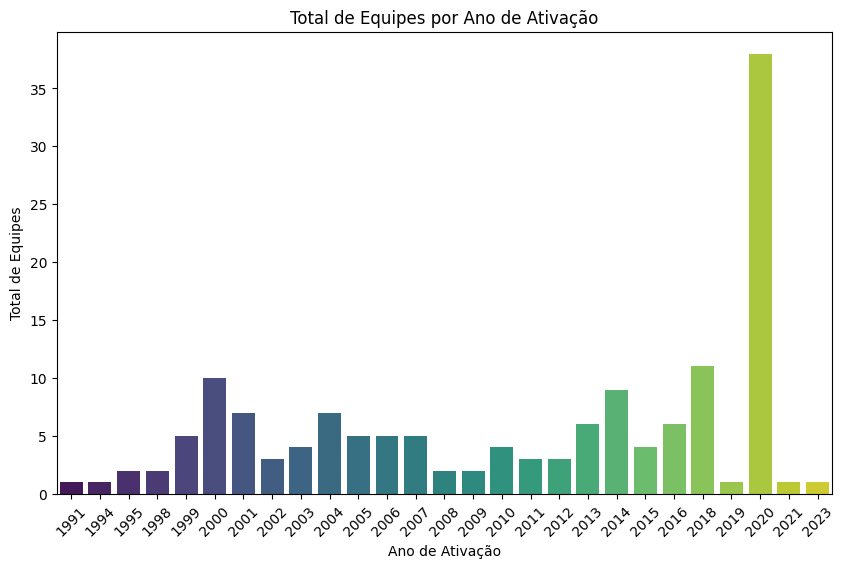

In [ ]:
df_ano = df_relevantes.groupby("ANO_ATIVACAO").size().reset_index(name="TOTAL_EQUIPES")

plt.figure(figsize=(10, 6))
sns.barplot(x=df_ano["ANO_ATIVACAO"], y=df_ano["TOTAL_EQUIPES"], palette='viridis')

plt.title('Total de Equipes por Ano de Ativação')
plt.xlabel('Ano de Ativação')
plt.ylabel('Total de Equipes')
plt.xticks(rotation=45)

plt.show()

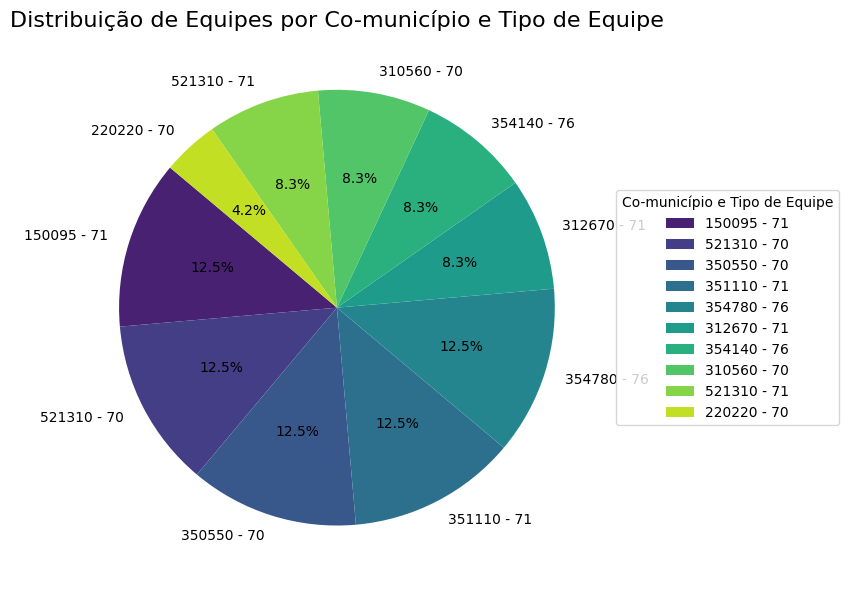

In [ ]:
df_pizza = df_relevantes.groupby(['CO_MUNICIPIO', 'TP_EQUIPE']).size().reset_index(name='TOTAL_EQUIPES')
df_pizza['LABEL'] = df_pizza['CO_MUNICIPIO'].astype(str) + ' - ' + df_pizza['TP_EQUIPE'].astype(str)

top_municipios_equipes = df_pizza.sort_values('TOTAL_EQUIPES', ascending=False).head(10)

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    top_municipios_equipes['TOTAL_EQUIPES'],
    labels=top_municipios_equipes['LABEL'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(top_municipios_equipes))
)

plt.legend(
    wedges,
    top_municipios_equipes['LABEL'],
    title="Co-município e Tipo de Equipe",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Distribuição de Equipes por Co-município e Tipo de Equipe', fontsize=16)
plt.tight_layout()
plt.show()


In [102]:
df[0]

{'CO_MUNICIPIO': 220050,
 'CO_AREA': 3,
 'SEQ_EQUIPE': 65099,
 'CO_UNIDADE': 2200500955078,
 'TP_EQUIPE': 70,
 'CO_SUB_TIPO_EQUIPE': nan,
 'NO_REFERENCIA': 'UBS SAO JOSE',
 'DT_ATIVACAO': '02/09/1991',
 'DT_DESATIVACAO': nan,
 'TP_POP_ASSIST_QUILOMB': 2,
 'TP_POP_ASSIST_ASSENT': 2,
 'TP_POP_ASSIST_GERAL': 1,
 'TP_POP_ASSIST_ESCOLA': 1,
 'TP_POP_ASSIST_PRONASCI': 2,
 'TP_POP_ASSIST_INDIGENA': 2,
 'TP_POP_ASSIST_RIBEIRINHA': 2,
 'TP_POP_ASSIST_SITUACAO_RUA': 2.0,
 'TP_POP_ASSIST_PRIV_LIBERDADE': 2.0,
 'TP_POP_ASSIST_CONFLITO_LEI': 2.0,
 'TP_POP_ASSIST_ADOL_CONF_LEI': 2.0,
 'CO_CNES_UOM': nan,
 'NU_CH_AMB_UOM': 0,
 'CD_MOTIVO_DESATIV': nan,
 'CD_TP_DESATIV': nan,
 'CO_PROF_SUS_PRECEPTOR': nan,
 'CO_CNES_PRECEPTOR': nan,
 'CO_EQUIPE': 65099,
 'TO_CHAR(DT_ATUALIZACAO)': '04/02/2025',
 'NO_USUARIO': 'SCNES',
 'TO_CHAR(DT_ATUALIZACAO_ORIGEM)\r': '03/09/2020\r'}

In [103]:
path = "tbEquipe.csv"

#read line by line
with open(path, 'r') as file:
    for line in file:
        print(len(line.split(';')))

30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30


In [104]:
import csv
data = []
with open("tbEquipe.csv", 'r', encoding="latin1") as file:
    reader = csv.reader(file, delimiter=';', quotechar='"', lineterminator="\r")
    headers = next(reader)  # Skip header row
    
    for row in reader:
        print(row)
        record = {}
        for index, value in enumerate(row):
            record[headers[index]] = value.strip() if value else None
        data.append(record)
            

['220050', '3', '65099', '2200500955078', '70', '', 'UBS SAO JOSE', '02/09/1991', '', '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '', '0', '', '', '', '', '65099', '04/02/2025', 'SCNES', '03/09/2020']
['420070', '1', '400033', '4200702418592', '70', '', 'EQUIPE 01', '01/03/2000', '', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '', '0', '', '', '', '', '400033', '09/01/2025', '09/01/2025', '14/09/2020']
['431560', '34', '1679686', '4315603431495', '70', '', 'DR JAIME COPSTEIN TREVO', '27/03/2019', '', '1', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '', '0', '', '', '', '', '1679686', '09/12/2024', 'SECRETARIA', '14/09/2020']
['500525', '1', '443050', '5005252482541', '70', '', 'UNIDADE S. DA FAMILIA URBANA', '07/12/2004', '', '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '2', '', '0', '', '', '', '', '443050', '07/02/2025', 'SAUDE', '14/09/2020']
['310500', '4', '1547151', '3105002126982', '70', '', 'RUBI', '01/08/2014', '', '2', '2', '1', '2', '2', '2',

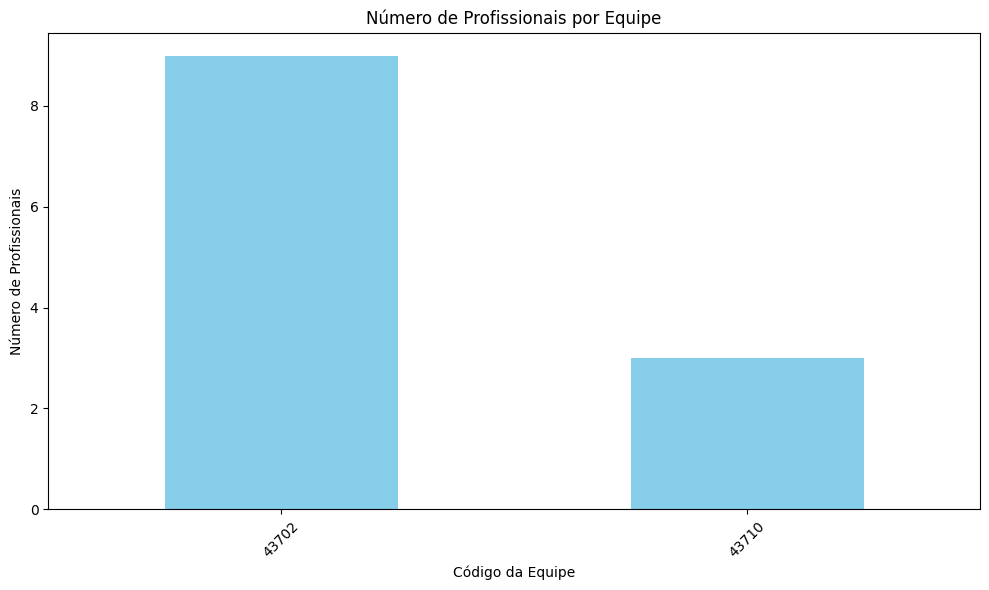

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler os arquivos CSV
prof_df = pd.read_csv('tbProf.csv', sep=';')
equipe_prof_df = pd.read_csv('tbEquipeProf.csv', sep=';')

# Contar o número de profissionais por equipe
profissionais_por_equipe = equipe_prof_df['SEQ_EQUIPE'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
profissionais_por_equipe.plot(kind='bar', color='skyblue')
plt.title('Número de Profissionais por Equipe')
plt.xlabel('Código da Equipe')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()